In [72]:
import pandas as pd

df = pd.read_excel('../data/news-test.xlsx')
df = df.dropna()
df

,Indent Level,Item and Group,Weight,Parent,Colors
1,2,Occupational Health,0.0240,Health Types,blue
2,2,Sexual Health,0.0240,Health Types,blue
3,2,Reproductive Health,0.0240,Health Types,blue
4,2,eHealth,0.0240,Health Types,blue
5,2,Mental Health,0.0240,Health Types,blue
6,2,Child Health,0.0240,Health Types,blue
7,2,Refugee Health,0.0240,Health Types,blue
8,2,Telehealth,0.0240,Health Types,blue
9,2,Public Health,0.0240,Health Types,blue
11,2,Medication,0.0275,Healthcare Systems,turquoise


In [110]:
import plotly.express as px

color_map = {
    'Health Types': 'lightpink',          
    'Healthcare Systems': 'mediumturquoise',  
    'Telemedicine': 'khaki',      
    'Global Threats': 'indianred',       
    'Computer Science': 'darkslateblue'    
}

fig2 = px.sunburst(df, path = ['Parent', 'Item and Group'], values = 'Weight', color = "Parent", color_discrete_map=color_map, maxdepth = 2)
fig2.update_layout(
        title={
        'text': "A sub-sample of the filtered tags",
        'x': 0.5,
        'xanchor': 'center',
        'y': 0.96,
        'yanchor': 'top'
    },
    # title_text="A sub-sample of the filtered tags", 
    font_size = 10)
fig2.show()

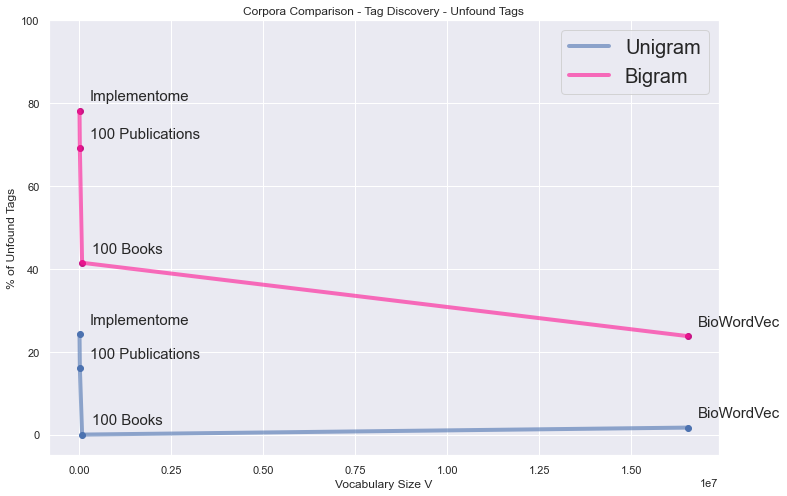

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

x = [6032, 15322, 76219, 16545452]
org = [24.19, 16.13, 0, 1.69]
recall = [78.22, 69.13, 41.49, 23.76]

annotations = ['Implementome', '100 Publications', '100 Books', 'BioWordVec']

plt.figure(figsize = (12, 8))
plt.title('Corpora Comparison - Tag Discovery - Unfound Tags')
plt.scatter(x, org)
plt.scatter(x, recall, color = 'mediumvioletred')
plt.plot(x, org, linewidth = 4, alpha = 0.6, label = 'Unigram')
plt.plot(x, recall, linewidth = 4, alpha = 0.6, label = 'Bigram', color = 'deeppink')
plt.legend(fontsize = 20)
plt.ylabel('% of Unfound Tags')
plt.xlabel('Vocabulary Size V')
plt.ylim(-5, 100)

for i, txt in enumerate(annotations):
    plt.annotate(txt, (x[i], org[i]), xytext=(10, 10), textcoords='offset points', fontsize=15)
    plt.annotate(txt, (x[i], recall[i]), xytext=(10, 10), textcoords='offset points', fontsize=15)

plt.show()

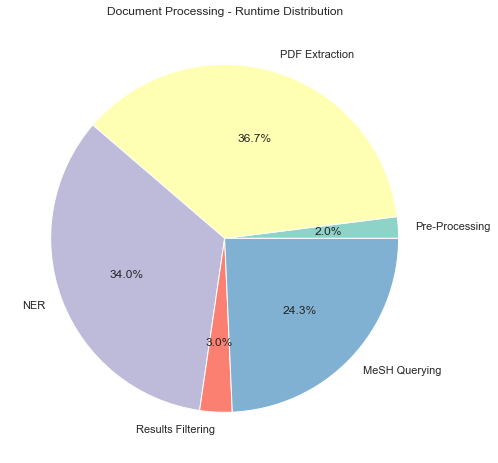

In [26]:
sns.set()

times = [2, 36.7, 34, 3, 24.3]
legend = ['Pre-Processing', 'PDF Extraction', 'NER', 'Results Filtering', 'MeSH Querying']
colors = plt.cm.Set3.colors

# annotations = ['Implementome', '100 Publications', '100 Books', 'BioWordVec']

plt.figure(figsize = (12, 8))
plt.title('Document Processing - Runtime Distribution')
plt.pie(times, labels=legend, autopct='%1.1f%%', colors = colors)

# for i, txt in enumerate(annotations):
#     plt.annotate(txt, (x[i], org[i]), xytext=(10, 10), textcoords='offset points', fontsize=10)
#     plt.annotate(txt, (x[i], recall[i]), xytext=(10, 10), textcoords='offset points', fontsize=10)

plt.show()

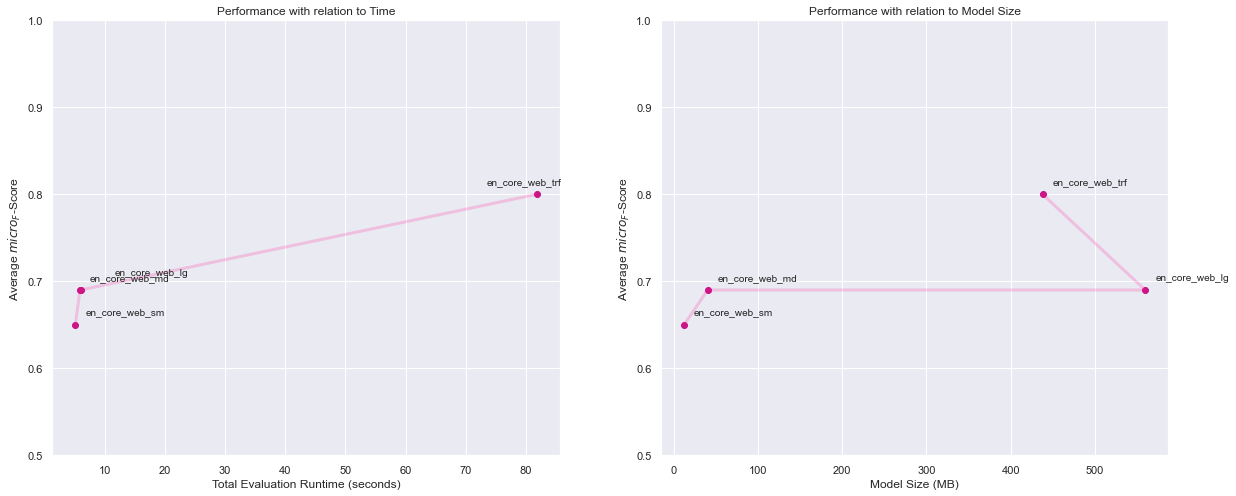

In [2]:
x = [5.1007, 5.8665, 5.9935, 81.7565]
x_size = [12, 40, 560, 438]
org = [0.69, 0.72, 0.72, 0.81]
gpe = [0.74, 0.79, 0.79, 0.80]
recall = [0.66, 0.68, 0.68, 0.80]
f_score = [0.65, 0.69, 0.69, 0.80]

annotations = ['en_core_web_sm', 'en_core_web_md', 'en_core_web_lg', 'en_core_web_trf']


fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 8))

axs[0].scatter(x, f_score, color = 'mediumvioletred')
axs[0].plot(x, f_score, linewidth = 3, alpha = 0.2, color = 'deeppink')
axs[0].set_title('Performance with relation to Time')
axs[0].set_xlabel('Total Evaluation Runtime (seconds)')
axs[0].set_ylabel(r'Average $micro_F$-Score')
axs[0].set_ylim(0.5, 1.0)

axs[1].scatter(x_size, f_score, color = 'mediumvioletred')
axs[1].plot(x_size, f_score, linewidth = 3, alpha = 0.2, color = 'deeppink')
axs[1].set_title('Performance with relation to Model Size')
axs[1].set_xlabel('Model Size (MB)')
axs[1].set_ylabel(r'Average $micro_F$-Score')
axs[1].set_ylim(0.5, 1.0)


for i, txt in enumerate(annotations):
    # plt.annotate(txt, (x[i], org[i]), xytext=(10, 10), textcoords='offset points', fontsize=10)
    if txt == "en_core_web_lg":
        axs[0].annotate(txt, (x[i] + 4, f_score[i] + 0.006), xytext=(10, 10), textcoords='offset points', fontsize=10)
    elif txt == "en_core_web_trf":
        axs[0].annotate(txt, (x[i] - 10, f_score[i]), xytext=(10, 10), textcoords='offset points', fontsize=10)
    else:
        axs[0].annotate(txt, (x[i], f_score[i]), xytext=(10, 10), textcoords='offset points', fontsize=10)

for i, txt in enumerate(annotations):
    axs[1].annotate(txt, (x_size[i], f_score[i]), xytext=(10, 10), textcoords='offset points', fontsize=10)


plt.show()

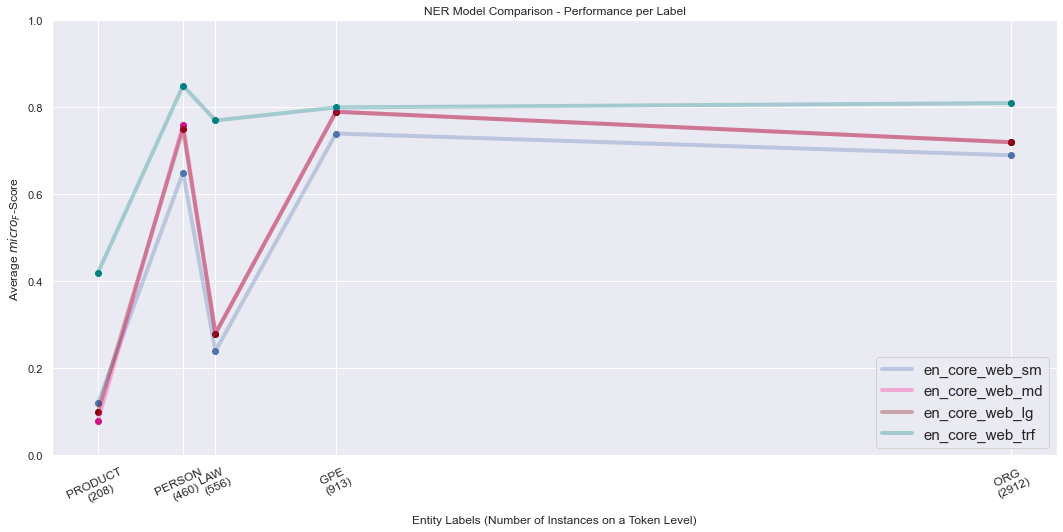

In [9]:
x_things = ['PRODUCT', 'PERSON', 'LAW', 'GPE', 'ORG']
x = [208, 460, 556, 913, 2912]
y_accuracy_finetuned_md = [0.12, 0.65, 0.24, 0.74, 0.69]
y_accuracy_md = [0.08, 0.76, 0.28, 0.79, 0.72]
y_accuracy_lg = [0.10, 0.75, 0.28, 0.79, 0.72]
y_accuracy_finetuned_lg = [0.42, 0.85, 0.77, 0.80, 0.81]

annotations = ['PRODUCT', 'PERSON', 'LAW', 'GPE', 'ORG']

plt.figure(figsize = (18, 8))
plt.title('NER Model Comparison - Performance per Label')

plt.scatter(x, y_accuracy_finetuned_md)
plt.scatter(x, y_accuracy_md, color = 'mediumvioletred')
plt.scatter(x, y_accuracy_lg, color = 'maroon')
plt.scatter(x, y_accuracy_finetuned_lg, color = 'teal')

plt.plot(x, y_accuracy_finetuned_md, linewidth = 4, alpha = 0.3, label = 'en_core_web_sm')
plt.plot(x, y_accuracy_md, linewidth = 4, alpha = 0.3, label = 'en_core_web_md', color = 'deeppink')
plt.plot(x, y_accuracy_lg, linewidth = 4, alpha = 0.3, label = 'en_core_web_lg', color = 'maroon')
plt.plot(x, y_accuracy_finetuned_lg, linewidth = 4, alpha = 0.3, label = 'en_core_web_trf', color = 'teal')

plt.legend(fontsize = 15, loc = 'lower right')
plt.ylabel(r'Average $micro_F$-Score')
plt.xlabel('Entity Labels (Number of Instances on a Token Level)')
plt.ylim(0, 1.0)
plt.xticks(x, [f'{label} \n({value})' for label, value in zip(x_things, x)], rotation=25, fontsize = 12)

# for i, txt in enumerate(annotations):
#     plt.annotate(txt, (x[i], y_accuracy_sm[i]), xytext=(10, 10), textcoords='offset points', fontsize=10)
#     plt.annotate(txt, (x[i], y_accuracy_md[i]), xytext=(10, 10), textcoords='offset points', fontsize=10)

plt.show()

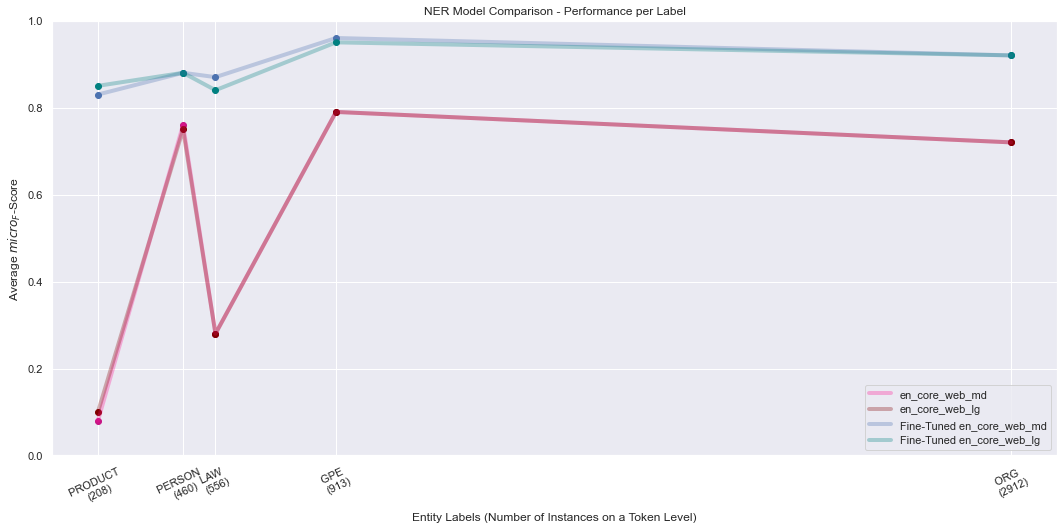

In [8]:
x_things = ['PRODUCT', 'PERSON', 'LAW', 'GPE', 'ORG']
x = [208, 460, 556, 913, 2912]

y_accuracy_md = [0.08, 0.76, 0.28, 0.79, 0.72]
y_accuracy_finetuned_md = [0.83, 0.88, 0.87, 0.96, 0.92]

y_accuracy_lg = [0.10, 0.75, 0.28, 0.79, 0.72]
y_accuracy_finetuned_lg = [0.85, 0.88, 0.84, 0.95, 0.92]

annotations = ['PRODUCT', 'PERSON', 'LAW', 'GPE', 'ORG']

plt.figure(figsize = (18, 8))
plt.title('NER Model Comparison - Performance per Label')

plt.scatter(x, y_accuracy_md, color = 'mediumvioletred')
plt.scatter(x, y_accuracy_lg, color = 'maroon')
plt.scatter(x, y_accuracy_finetuned_md)
plt.scatter(x, y_accuracy_finetuned_lg, color = 'teal')

plt.plot(x, y_accuracy_md, linewidth = 4, alpha = 0.3, label = 'en_core_web_md', color = 'deeppink')
plt.plot(x, y_accuracy_lg, linewidth = 4, alpha = 0.3, label = 'en_core_web_lg', color = 'maroon')
plt.plot(x, y_accuracy_finetuned_md, linewidth = 4, alpha = 0.3, label = 'Fine-Tuned en_core_web_md')
plt.plot(x, y_accuracy_finetuned_lg, linewidth = 4, alpha = 0.3, label = 'Fine-Tuned en_core_web_lg', color = 'teal')

plt.legend()
plt.ylabel(r'Average $micro_F$-Score')
plt.xlabel('Entity Labels (Number of Instances on a Token Level)')
plt.ylim(0, 1.0)
plt.xticks(x, [f'{label} \n({value})' for label, value in zip(x_things, x)], rotation=25)

# for i, txt in enumerate(annotations):
#     plt.annotate(txt, (x[i], y_accuracy_sm[i]), xytext=(10, 10), textcoords='offset points', fontsize=10)
#     plt.annotate(txt, (x[i], y_accuracy_md[i]), xytext=(10, 10), textcoords='offset points', fontsize=10)

plt.show()